In [1]:
# MLF_GP1_CreditScore data Dataset used

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import pylab

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from scipy import exp

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

In [44]:
# Import data

file_cs = open('MLF_GP1_CreditScore1.csv')
CS = pd.read_csv(file_cs)
CS

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.099327,-0.010702,-0.127046,-0.030785,-4.349569,0.124830,0.146400,0.008407,0.364676,-0.028333,...,-0.190974,0.603271,-0.150779,0.144187,-4.408257,-1.339781,-4.271318,-5.168673,0,Caa1
1696,-0.116919,-0.009799,-0.155183,-0.043333,-2.937747,0.157873,0.066243,0.084104,0.309846,0.808505,...,-0.246259,0.007110,0.604043,0.127468,-2.977064,-1.695900,-2.868086,-3.429429,0,Caa1
1697,-0.099676,0.067595,-0.170022,-0.078134,-1.960264,0.023226,-0.201398,0.024856,0.020078,1.352542,...,-0.266848,-0.959809,1.227363,0.056198,-1.955285,-1.919739,-1.876336,-1.940995,0,Caa1
1698,-0.088853,0.007820,-0.122645,-0.037088,-2.066509,0.067495,-0.011377,0.289219,-0.171802,0.671224,...,-0.226685,-0.438389,0.865331,-0.104059,-2.059347,-1.462429,-2.027254,-2.059961,0,Caa1


In [45]:
# Summary of Data
# Data Information

CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [46]:
# Summary of Data
# Data Description

CS.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [47]:
# Preprocessing
# Finding NA in Dataset

print(CS[CS.isna().any(axis = 1)])

Empty DataFrame
Columns: [Sales/Revenues, Gross Margin, EBITDA, EBITDA Margin, Net Income Before Extras, Total Debt, Net Debt, LT Debt, ST Debt, Cash, Free Cash Flow, Total Debt/EBITDA, Net Debt/EBITDA, Total MV, Total Debt/MV, Net Debt/MV, CFO/Debt, CFO, Interest Coverage, Total Liquidity, Current Liquidity, Current Liabilities, EPS Before Extras, PE, ROA, ROE, InvGrd, Rating]
Index: []

[0 rows x 28 columns]


In [5]:
# There is no empty value in dataset

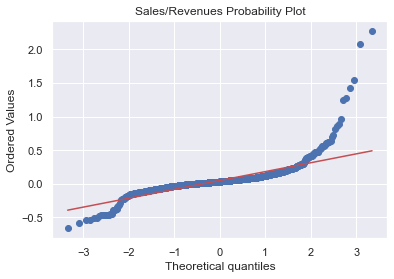

In [33]:
# EDA Part
# Part1 Q-Q Plot

scipy.stats.probplot(CS['Sales/Revenues'], dist = 'norm', plot = pylab)
pylab.title('Sales/Revenues Probability Plot')
pylab.show()

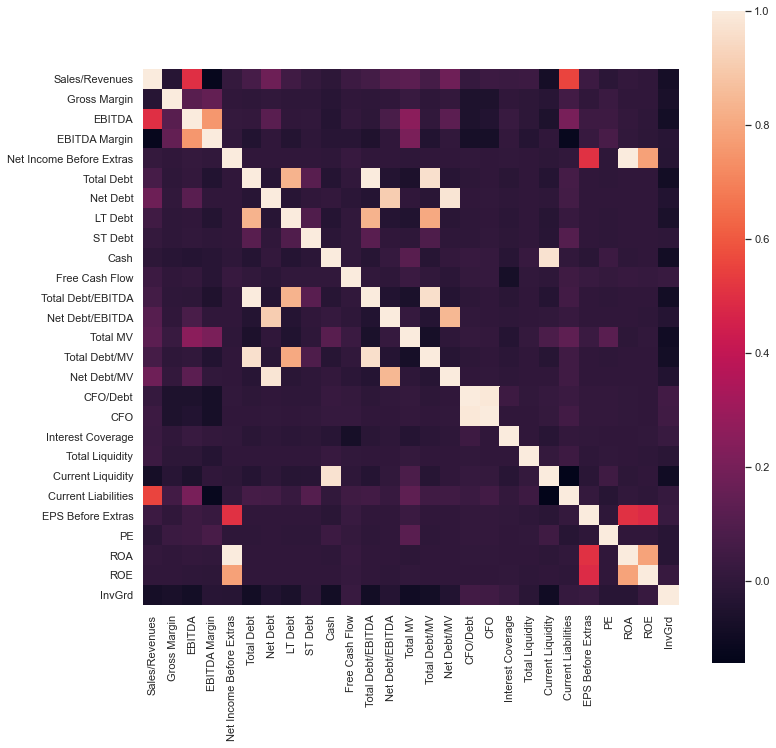

In [34]:
# EDA Part
# Part2 Heatmap

plt.figure(figsize = (12, 12))

cols_name_cs = CS.columns.values.tolist()
cols_name_cs.remove("Rating") # Rating is object, not number

corr_CS = np.corrcoef(CS[cols_name_cs].values.T)
sns.set(font_scale = 1)
heatmap_CS = sns.heatmap(corr_CS, cbar = True, annot = False, square = True, 
                fmt = '.3f', annot_kws = {'size': 20}, yticklabels = cols_name_cs, 
                xticklabels = cols_name_cs)

plt.show()


<Figure size 1080x1080 with 0 Axes>

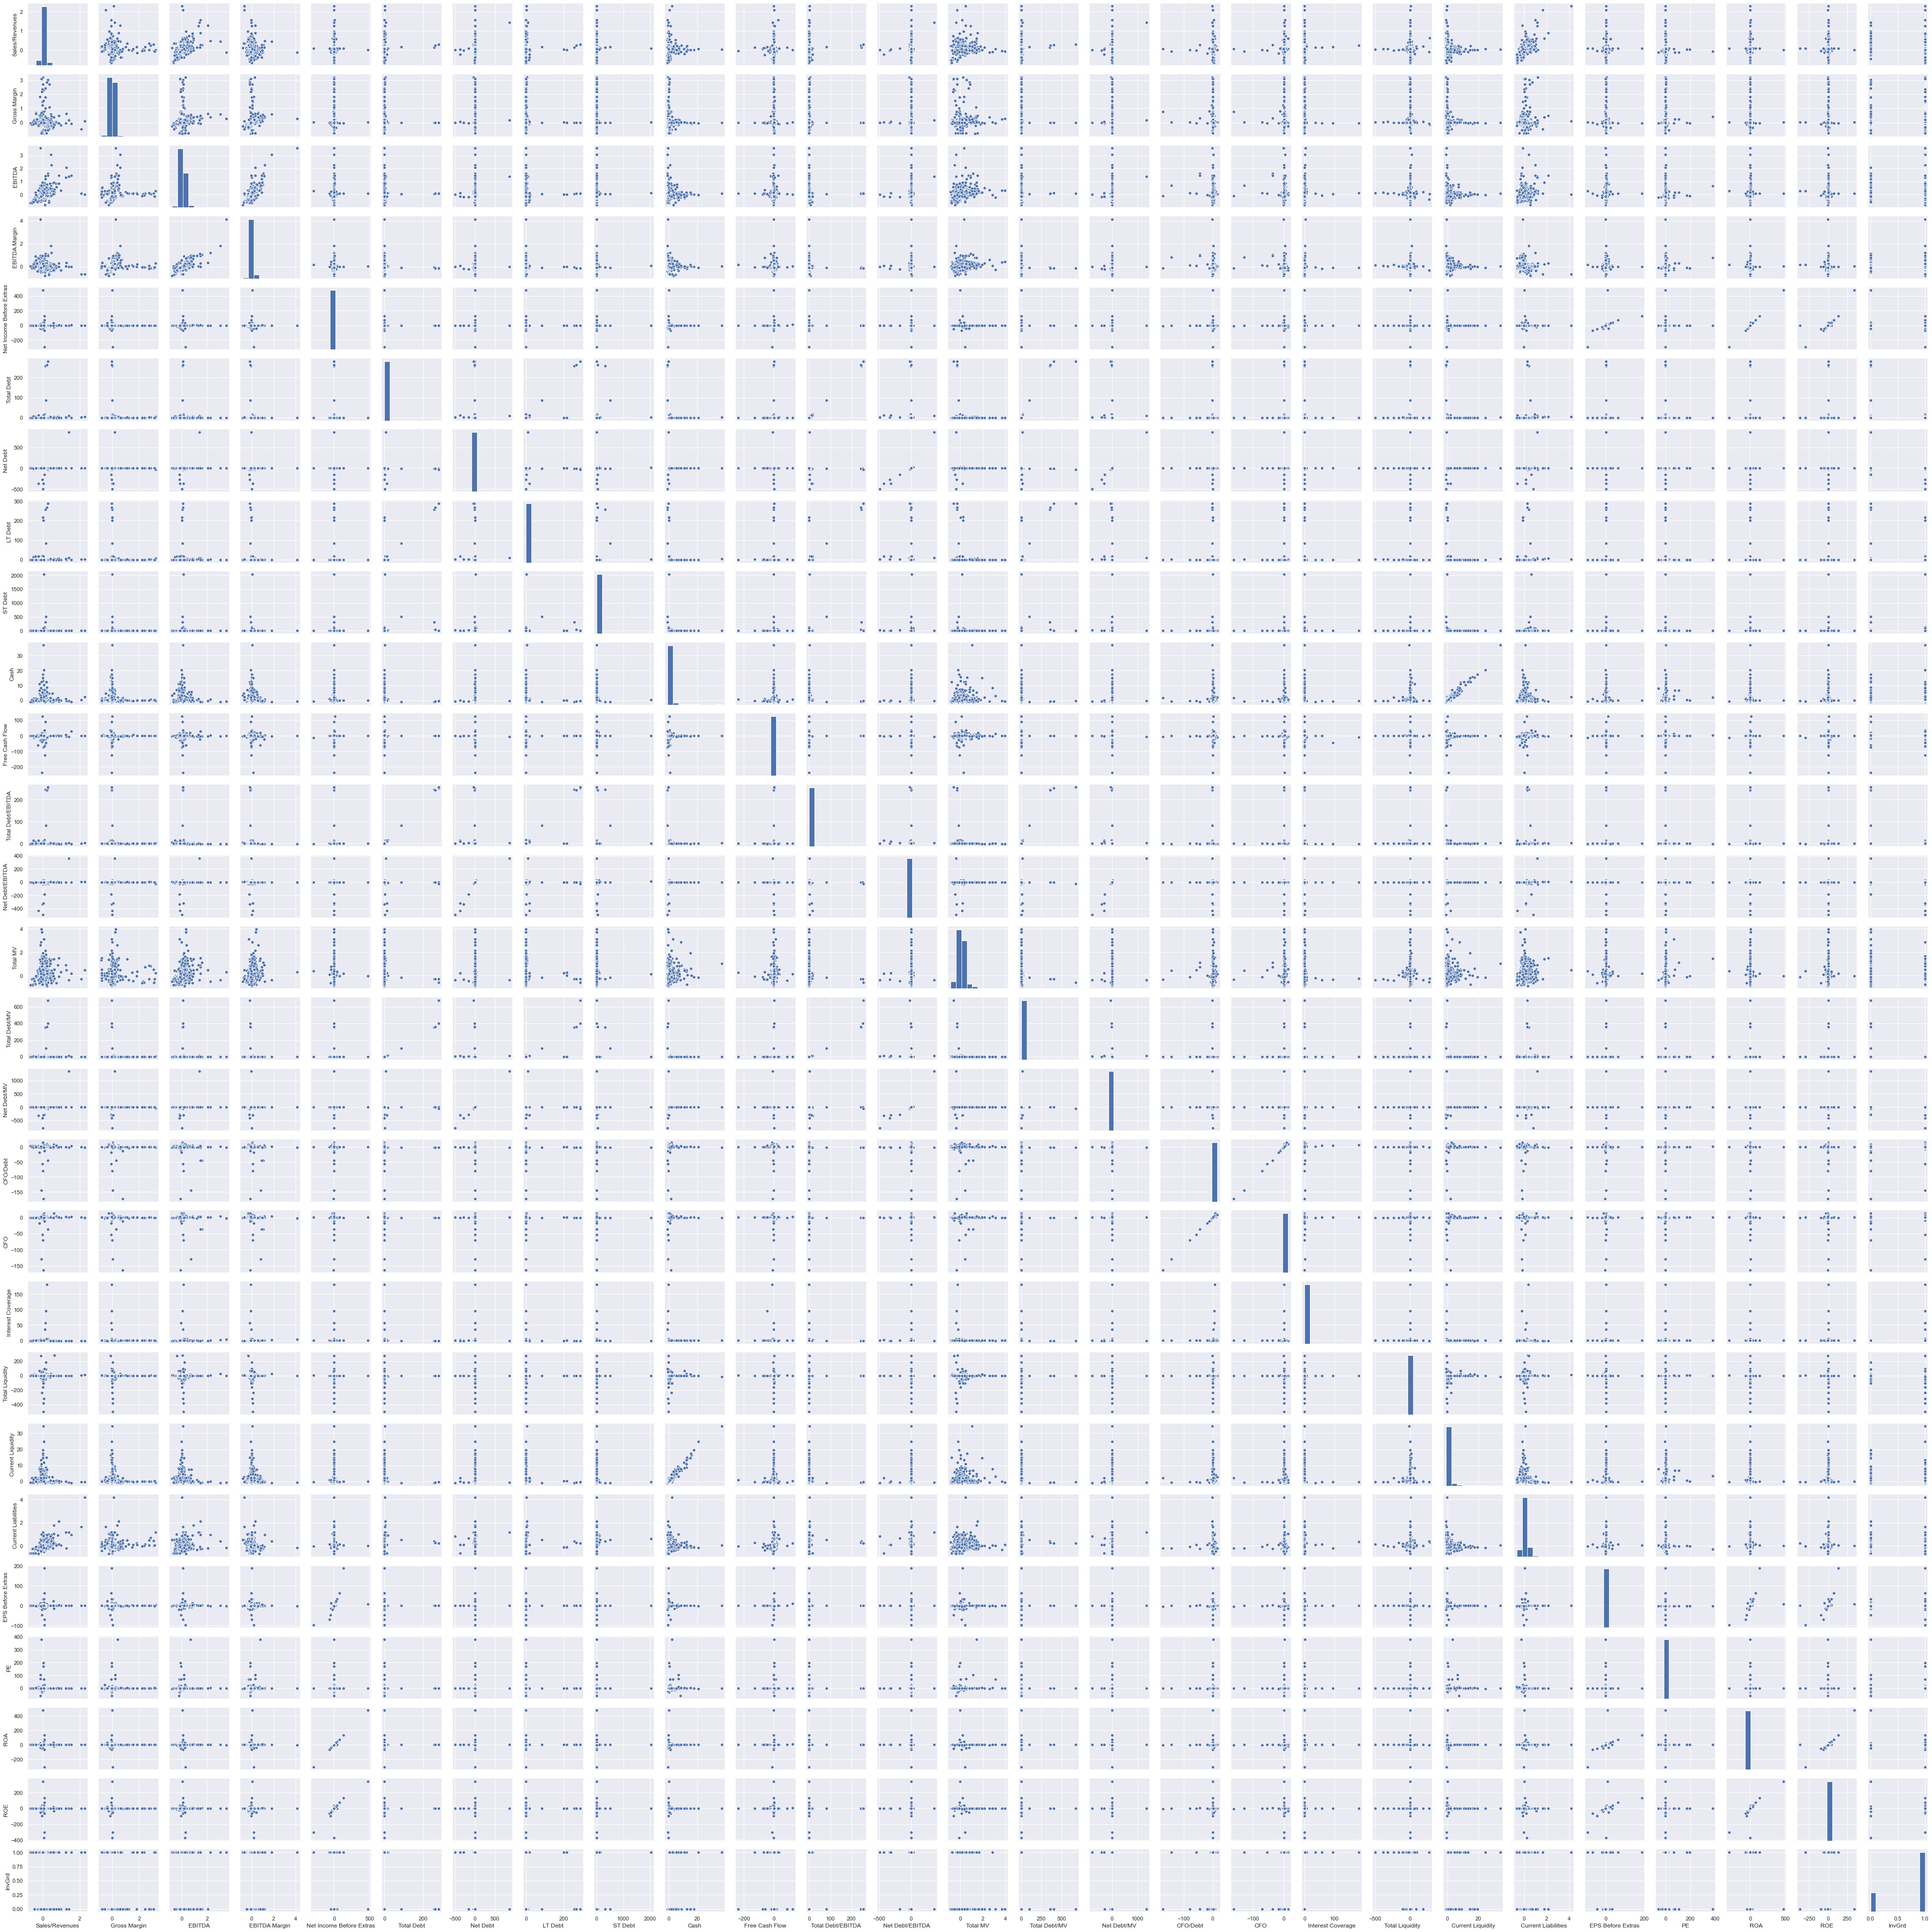

In [32]:
# EDA Part
# Part3 Scatterplot & Histogram

plt.figure(figsize = (15, 15))
sns.pairplot(CS[cols_name_cs], height = 2)
plt.tight_layout()
plt.show()

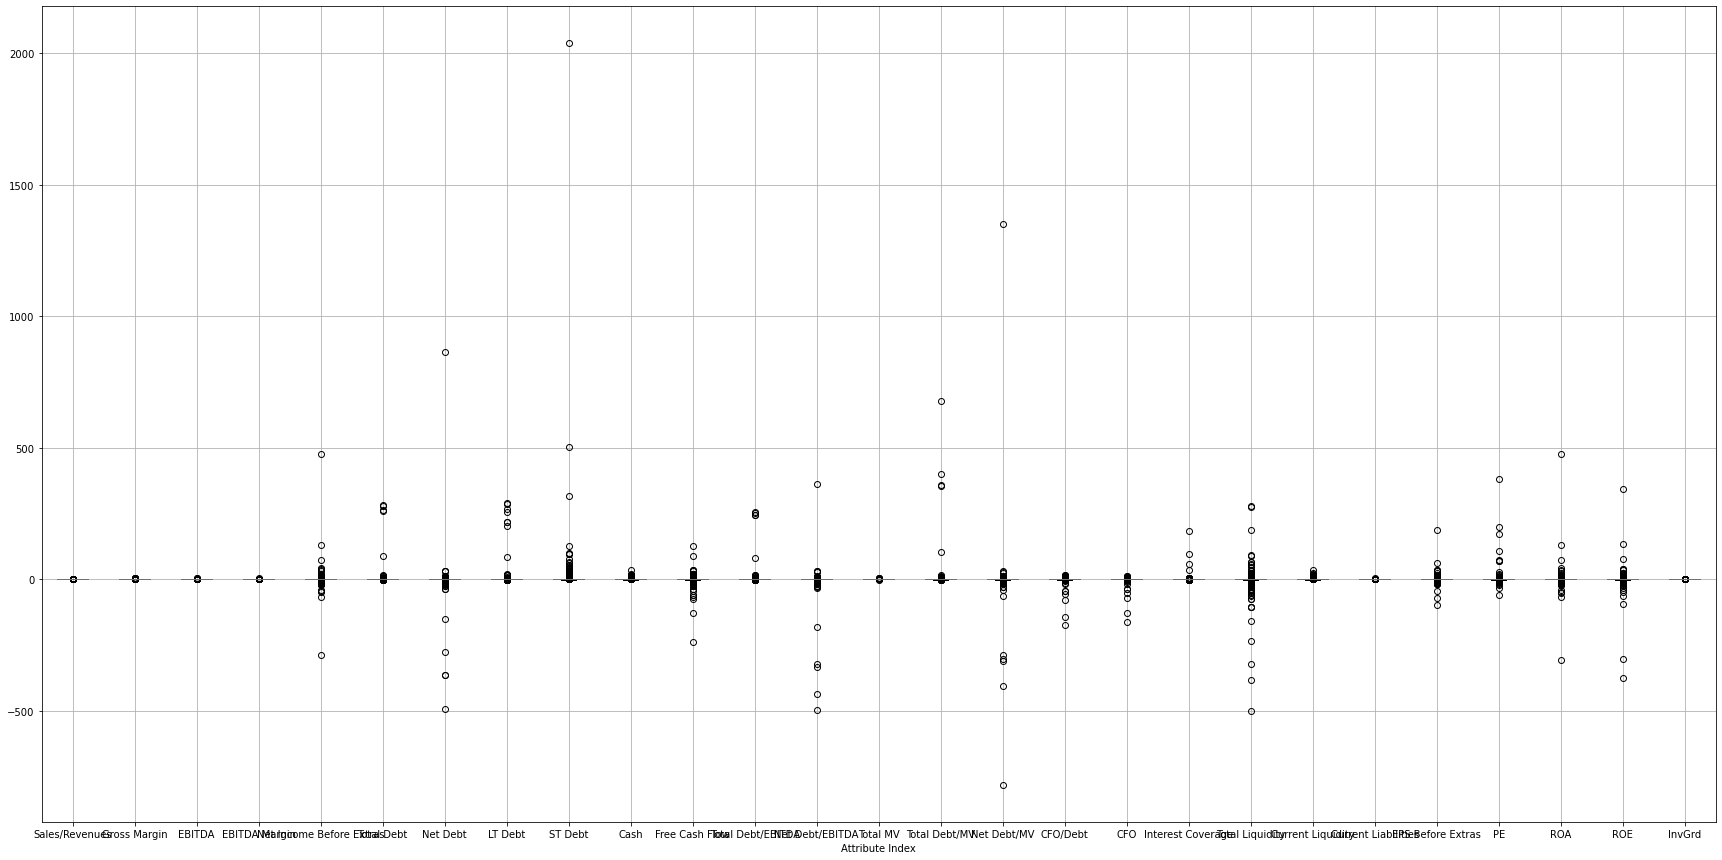

In [48]:
# EDA Part
# Part4 Boxplot

plt.figure(figsize = (30, 15))

f = CS.boxplot()
plt.xlabel("Attribute Index")
plt.show()

In [49]:
# Preprocessing
# Outliner Operation

# y don't need this
for i in range(len(CS.columns) - 2):
    Q1 = np.quantile(CS.iloc[:,i],0.25,interpolation='lower')
    Q3 = np.quantile(CS.iloc[:,i],0.75,interpolation='higher')
    IQR = Q3 - Q1
    ex_low_quantile = Q1 - 3*IQR
    ex_high_quantile = Q3 + 3*IQR
    
    for j in range(len(CS.index) - 1, -1, -1):

        if CS.iloc[j, i] <= ex_high_quantile and CS.iloc[j, i] >= ex_low_quantile:
            pass
        else:
            CS.drop(CS.index[[j]], inplace=True)  


In [50]:
# Preprocessing
# Outliner Operation

CS

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.028788,-0.068815,-0.038878,-0.065767,-0.531760,-0.002374,-0.000596,-0.023690,0.138554,-0.005882,...,-0.091066,-0.098456,-0.145402,0.163251,-0.538356,0.800289,-0.564992,-0.590919,1,Baa3
1679,0.028788,-0.065689,-0.033333,-0.060382,-0.531760,-0.002374,-0.000596,-0.023690,0.138554,-0.005882,...,-0.085822,-0.098456,-0.145402,0.163251,-0.538356,0.451447,-0.564992,-0.590919,1,Baa3
1680,0.033372,-0.105908,-0.113255,-0.141890,-0.344383,-0.004362,0.233806,-0.029131,0.163077,-0.432852,...,-0.153931,-0.769097,-0.425765,-0.012340,-0.351955,0.037050,-0.347511,-0.395852,1,Baa3
1681,0.016335,-0.080192,-0.117460,-0.131641,-0.369952,-0.007174,0.211218,-0.030068,0.152866,-0.189327,...,-0.067740,-0.291271,-0.208378,0.024069,-0.375616,0.467045,-0.371733,-0.408697,1,Baa3


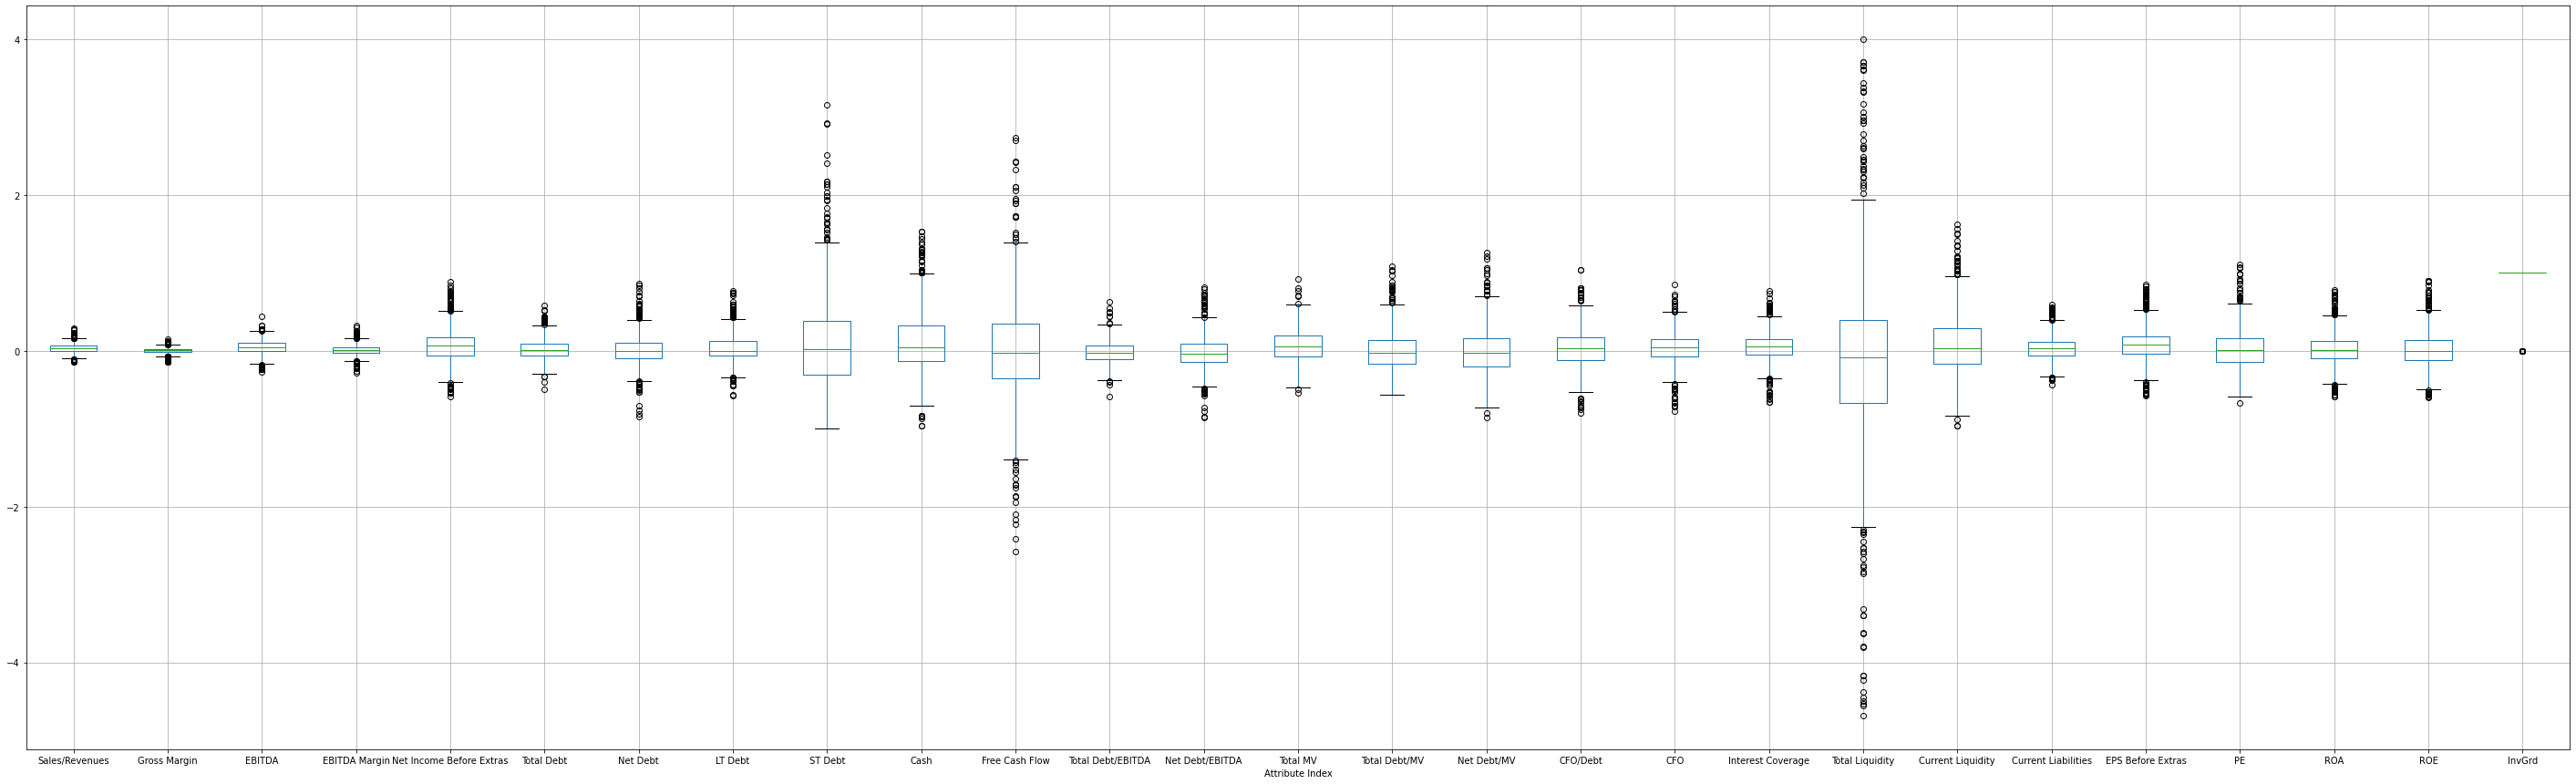

In [70]:
# Preprocessing
# Outliner Operation

plt.figure(figsize = (50, 15))

f = CS.boxplot()
plt.xlabel("Attribute Index")
plt.show()

In [52]:
# Binary Classifier for InvGrd
# Preprocessing
# Standization and X_y Split

x_cols_name_cs = CS.drop(['InvGrd', 'Rating'], axis = 1).columns
X = CS.loc[:, x_cols_name_cs].values
y_InvGrd = CS['InvGrd'].values

scalerX = StandardScaler()
scalerX.fit(X)
X_std = scalerX.transform(X)


In [53]:
# Binary Classifier for InvGrd
# Binary Classifier for InvGrd
# Train-Test Split 

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_std, y_InvGrd, 
                                                            test_size = 0.1, 
                                                            random_state = 1)

x1, sum: 0.2630514150237779, single 0.2630514150237779
x2, sum: 0.41964932539628497, single 0.15659791037250706
x3, sum: 0.5201983752901809, single 0.10054904989389592
x4, sum: 0.604280306829813, single 0.08408193153963216
x5, sum: 0.6822818932959379, single 0.07800158646612484
x6, sum: 0.7446667847719833, single 0.06238489147604545
x7, sum: 0.802428660639139, single 0.05776187586715568
x8, sum: 0.8537782864559286, single 0.051349625816789604
x9, sum: 0.885759701977552, single 0.03198141552162352
x10, sum: 0.9124627494686347, single 0.02670304749108265
x11, sum: 0.93488771845844, single 0.022424968989805314
x12, sum: 0.9500289677055915, single 0.015141249247151541
x13, sum: 0.964311874819936, single 0.014282907114344446
x14, sum: 0.9767791209938814, single 0.012467246173945451
x15, sum: 0.9856516374634929, single 0.008872516469611527
x16, sum: 0.9906335148950742, single 0.004981877431581255
x17, sum: 0.9946084239668099, single 0.003974909071735724
x18, sum: 0.9964610066353469, single 0

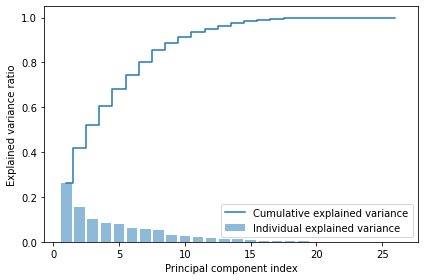

In [54]:
# Binary Classifier for InvGrd
# PCA 

# Eigendecomposition of the covariance matrix.
cov_mat = np.cov(X_train_b.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Total and explained variance
tot = sum(eigen_vals)
var_exp =[ (i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp =np.array( [(i / tot) for i in sorted(eigen_vals, reverse=True)])

for i in range(1, 27):
    print("x" + str(i) + ", sum: " + str(cum_var_exp[i - 1]) 
          + ", single " + str(var_exp[i - 1]))

plt.bar(range(1, 27), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [55]:
# Binary Classifier for InvGrd
# PCA

N = 8

pca = PCA(n_components = N)
X_train_b_pca = pca.fit_transform(X_train_b)
X_test_b_pca = pca.transform(X_test_b)
print("The cumulative explained variance of " + str(N) + "pca features:")
print(pca.explained_variance_ratio_)

The cumulative explained variance of 8pca features:
[0.26305142 0.15659791 0.10054905 0.08408193 0.07800159 0.06238489
 0.05776188 0.05134963]


In [56]:
# Binary Classifier for InvGrd
# Logistic Regression
# Hyperparameter Tuning

cv_b_lr = GridSearchCV(LogisticRegression(), 
                    {'C' : range(1,101)},
                    cv=10, scoring='roc_auc')
cv_b_lr.fit(X_train_b_pca, y_train_b)
print("The best hyperparameter value:")
print(cv_b_lr.best_params_)

The best hyperparameter value:
{'C': 3}


In [57]:
# Binary Classifier for InvGrd
# Logistic Regression
# Training Predicting and Evaluating

C_b_best = 3

lr_b = LogisticRegression(C = C_b_best, random_state = 1)

lr_b.fit(X_train_b_pca, y_train_b)

y_pred_b_train_lr = lr_b.predict(X_train_b_pca)
y_pred_b_test_lr = lr_b.predict(X_test_b_pca)

score_b_train_lr = accuracy_score(y_train_b, y_pred_b_train_lr)
score_b_test_lr = accuracy_score(y_test_b, y_pred_b_test_lr)

print("In sample accuracy Score of InvGrd on Logistic Regression: ", 
      score_b_train_lr)
print("Out of sample accuracy Score of InvGrd on Logistic Regression: ", 
      score_b_test_lr)

In sample accuracy Score of InvGrd on Logistic Regression:  0.8745980707395499
Out of sample accuracy Score of InvGrd on Logistic Regression:  0.8714285714285714


In [20]:
# Binary Classifier for InvGrd
# K-Nearest Neighbors
# Hyperparameter Tuning

cv_b_knn = GridSearchCV(KNeighborsClassifier(), 
                    {'n_neighbors' : range(1,21)},
                    cv=10, scoring='roc_auc')
cv_b_knn.fit(X_train_b_pca, y_train_b)
print("The best hyperparameter value:")
print(cv_b_knn.best_params_)

The best hyperparameter value:
{'n_neighbors': 4}


In [21]:
# Binary Classifier for InvGrd
# K-Nearest Neighbors
# Training Predicting and Evaluating

K_b_best = 4

knn_b = KNeighborsClassifier(n_neighbors = K_b_best)

knn_b.fit(X_train_b_pca, y_train_b)

y_pred_b_train_knn = knn_b.predict(X_train_b_pca)
y_pred_b_test_knn = knn_b.predict(X_test_b_pca)

score_b_train_knn = accuracy_score(y_train_b, y_pred_b_train_knn)
score_b_test_knn = accuracy_score(y_test_b, y_pred_b_test_knn)

print("In sample accuracy Score of InvGrd on K-Nearest Neighbors: ", 
      score_b_train_knn)
print("Out of sample accuracy Score of InvGrd on K-Nearest Neighbors: ", 
      score_b_test_knn)

In sample accuracy Score of InvGrd on K-Nearest Neighbors:  0.9292604501607717
Out of sample accuracy Score of InvGrd on K-Nearest Neighbors:  0.9


In [22]:
# Binary Classifier for InvGrd
# Decision Tree
# Hyperparameter Tuning

cv_b_dt = GridSearchCV(DecisionTreeClassifier(), 
                    {'criterion' : ['gini','entropy'],
                    'max_depth' : range(1,11)},
                    cv=10, scoring='roc_auc')
cv_b_dt.fit(X_train_b_pca, y_train_b)
print("The best hyperparameter value:")
print(cv_b_dt.best_params_)

The best hyperparameter value:
{'criterion': 'entropy', 'max_depth': 6}


In [23]:
# Binary Classifier for InvGrd
# Decision Tree
# Training Predicting and Evaluating

Criterion_b_best = 'entropy'
MaxDepth_b_best = 6

dt_b = DecisionTreeClassifier(criterion = Criterion_b_best, 
                             max_depth = MaxDepth_b_best, 
                             random_state = 1)

dt_b.fit(X_train_b_pca, y_train_b)

y_pred_b_train_dt = dt_b.predict(X_train_b_pca)
y_pred_b_test_dt = dt_b.predict(X_test_b_pca)

score_b_train_dt = accuracy_score(y_train_b, y_pred_b_train_dt)
score_b_test_dt = accuracy_score(y_test_b, y_pred_b_test_dt)

print("In sample accuracy Score of InvGrd on Decision Tree: ", 
      score_b_train_dt)
print("Out of sample accuracy Score of InvGrd on Decision Tree: ", 
      score_b_test_dt)

In sample accuracy Score of InvGrd on Decision Tree:  0.9372990353697749
Out of sample accuracy Score of InvGrd on Decision Tree:  0.8428571428571429


In [41]:
# Binary Classifier for InvGrd
# Ensembling for Decision Tree - Random Forest
# Hyperparameter Tuning

cv_b_rf = GridSearchCV(RandomForestClassifier(), 
                    {'n_estimators' : range(100, 1500, 100)},
                    cv=10, scoring='roc_auc')
cv_b_rf.fit(X_train_b_pca, y_train_b)
print("The best hyperparameter value:")
print(cv_b_rf.best_params_)

The best hyperparameter value:
{'n_estimators': 200}


In [78]:
# Binary Classifier for InvGrd
# Ensembling for K-Nearest Neighbors
# Hyperparameter Tuning

K_b_best = 4

knn_i = KNeighborsClassifier(n_neighbors = K_b_best)

cv_b_knn = GridSearchCV(BaggingClassifier(base_estimator=knn_i,
                                          bootstrap=True,
                                          bootstrap_features=False,
                                          n_jobs=-1,
                                          random_state=1), 
                    {'n_estimators' : range(100, 1501, 100),
                    'max_samples' : range(25, 201, 25), 
                    'max_features': range(1, 9, 1)},
                    cv=5, scoring='accuracy')
cv_b_knn.fit(X_train_b_pca, y_train_b)
print("The best hyperparameter value:")
print(cv_b_knn.best_params_)

The best hyperparameter value:
{'max_features': 1, 'max_samples': 25, 'n_estimators': 100}


In [79]:
# Binary Classifier for InvGrd
# Ensembling for K-Nearest Neighbors
# Training Predicting and Evaluating



bag_b_knn = BaggingClassifier(base_estimator=knn_i,
                              n_estimators=100,
                              max_samples=25,
                              max_features=1,
                              bootstrap=True,
                              bootstrap_features=False,
                              n_jobs=-1,
                              random_state=1)

bag_b_knn.fit(X_train_b_pca, y_train_b)

y_pred_b_train_knnbag = bag_b_knn.predict(X_train_b_pca)
y_pred_b_test_knnbag = bag_b_knn.predict(X_test_b_pca)

score_b_train_knnbag = accuracy_score(y_train_b, y_pred_b_train_knnbag)
score_b_test_knnbag = accuracy_score(y_test_b, y_pred_b_test_knnbag)

print("In sample accuracy Score of InvGrd on Bagged KNN: ", 
      score_b_train_knnbag)
print("Out of sample accuracy Score of InvGrd on Bagged KNN: ", 
      score_b_test_knnbag)

In sample accuracy Score of InvGrd on Bagged KNN:  0.8745980707395499
Out of sample accuracy Score of InvGrd on Bagged KNN:  0.8714285714285714


In [26]:
# Multiclass Classifier for Rating
# Preprocessing
# Delete useless category

CS_min_Aaa = CS[ ~ CS['Rating'].str.contains('Aaa')]
CS_min_B3 = CS_min_Aaa[ ~ CS_min_Aaa['Rating'].str.contains('B3')]
CS_min = CS_min_B3[ ~ CS_min_B3['Rating'].str.contains('Caa1')]

In [27]:
# Multiclass Classifier for Rating
# Preprocessing
# Standization and X_y Split

x_cols_name_cs = CS_min.drop(['InvGrd', 'Rating'], axis = 1).columns
X_min = CS_min.loc[:, x_cols_name_cs].values
y_Rating = CS_min['Rating'].values

scalerX_min = StandardScaler()
scalerX_min.fit(X_min)
X_std_min = scalerX_min.transform(X_min)

In [74]:
# Multiclass Classifier for Ratin
# Preprocessing
# LabelEncoder

class_le = LabelEncoder()
y_Rating_en = class_le.fit_transform(y_Rating)

In [59]:
# Multiclass Classifier for Rating
# Train-Test Split 

X_train_m_imb, X_test_m, y_train_m_imb, y_test_m = train_test_split(X_std_min, y_Rating_en, 
                                                            test_size = 0.1, 
                                                            random_state = 1)

x1, sum: 0.26069369273145065, single 0.26069369273145065
x2, sum: 0.41309401854942573, single 0.1524003258179751
x3, sum: 0.5178098649215427, single 0.10471584637211694
x4, sum: 0.6035052169986388, single 0.08569535207709615
x5, sum: 0.6816257765059708, single 0.078120559507332
x6, sum: 0.7425035281528743, single 0.06087775164690358
x7, sum: 0.8000243106351427, single 0.05752078248226828
x8, sum: 0.8517609717429178, single 0.05173666110777507
x9, sum: 0.8848493114875896, single 0.033088339744671874
x10, sum: 0.9120572628628417, single 0.027207951375252153
x11, sum: 0.9347908773959225, single 0.022733614533080718
x12, sum: 0.9500982264463682, single 0.01530734905044578
x13, sum: 0.9641959738534907, single 0.014097747407122475
x14, sum: 0.9766144647820234, single 0.01241849092853278
x15, sum: 0.9857639515599196, single 0.009149486777896215
x16, sum: 0.9906307068935513, single 0.004866755333631624
x17, sum: 0.9945596551958541, single 0.0039289483023028805
x18, sum: 0.9964705960931796, sin

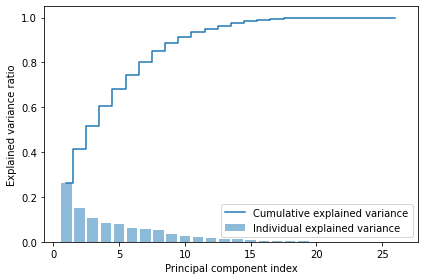

In [60]:
# Multiclass Classifier for Rating
# PCA 

# Eigendecomposition of the covariance matrix.
cov_mat = np.cov(X_train_m_imb.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Total and explained variance
tot = sum(eigen_vals)
var_exp =[ (i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp =np.array( [(i / tot) for i in sorted(eigen_vals, reverse=True)])

for i in range(1, 27):
    print("x" + str(i) + ", sum: " + str(cum_var_exp[i - 1]) 
          + ", single " + str(var_exp[i - 1]))

plt.bar(range(1, 27), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [31]:
# Multiclass Classifier for Rating
# PCA

N = 8

pca = PCA(n_components = N)
X_train_m_pca_imb = pca.fit_transform(X_train_m_imb)
X_test_m_pca = pca.transform(X_test_m)
print("The cumulative explained variance of " + str(N) + "pca features:")
print(pca.explained_variance_ratio_)

The cumulative explained variance of 8pca features:
[0.26069369 0.15240033 0.10471585 0.08569535 0.07812056 0.06087775
 0.05752078 0.05173666]


In [32]:
# Multiclass Classifier for Rating
# Dealing with imbalance - Oversampling the Minority

sm = SMOTE(sampling_strategy = 'minority', random_state = 1, k_neighbors = 3)

X_train_m_pca,y_train_m=sm.fit_sample(X_train_m_pca_imb, y_train_m_imb)

In [33]:
# Multiclass Classifier for Rating
# K-Nearest Neighbors
# Hyperparameter Tuning

cv_m_knn = GridSearchCV(KNeighborsClassifier(), 
                    {'n_neighbors' : range(1,21)}, # 1 will be 1 and overfitting
                    cv=10, scoring='accuracy')
cv_m_knn.fit(X_train_m_pca, y_train_m)
print("The best hyperparameter value:")
print(cv_m_knn.best_params_)

C:\Users\zhangchenxiang\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


The best hyperparameter value:
{'n_neighbors': 1}


In [34]:
# Multiclass Classifier for Rating
# K-Nearest Neighbors
# Training Predicting and Evaluating

K_m_best = 1

knn_m = KNeighborsClassifier(n_neighbors = K_m_best)

knn_m.fit(X_train_m_pca, y_train_m)

y_pred_m_train_knn = knn_m.predict(X_train_m_pca)
y_pred_m_test_knn = knn_m.predict(X_test_m_pca)

score_m_train_knn = accuracy_score(y_train_m, y_pred_m_train_knn)
score_m_test_knn = accuracy_score(y_test_m, y_pred_m_test_knn)

print("In sample accuracy Score of Rating on K-Nearest Neighbors: ", 
      score_m_train_knn)
print("Out of sample accuracy Score of Rating on K-Nearest Neighbors: ", 
      score_m_test_knn)

In sample accuracy Score of Rating on K-Nearest Neighbors:  1.0
Out of sample accuracy Score of Rating on K-Nearest Neighbors:  0.5217391304347826


In [35]:
# Multiclass Classifier for Rating
# Decision Tree
# Hyperparameter Tuning

cv_m_dt = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'), 
                    {'criterion' : ['gini','entropy'],
                    'max_depth' : range(1,15)},
                    cv=5, scoring='accuracy')
cv_m_dt.fit(X_train_m_pca, y_train_m)
print("The best hyperparameter value:")
print(cv_m_dt.best_params_)

The best hyperparameter value:
{'criterion': 'entropy', 'max_depth': 13}


In [36]:
# Multiclass Classifier for Rating
# Decision Tree
# Training Predicting and Evaluating

Criterion_b_best = 'entropy'
MaxDepth_b_best = 13

dt_m = DecisionTreeClassifier(criterion = Criterion_b_best, 
                             max_depth = MaxDepth_b_best, 
                             class_weight = 'balanced',
                             random_state = 1)

dt_m.fit(X_train_m_pca, y_train_m)

y_pred_m_train_dt = dt_m.predict(X_train_m_pca)
y_pred_m_test_dt = dt_m.predict(X_test_m_pca)

score_m_train_dt = accuracy_score(y_train_m, y_pred_m_train_dt)
score_m_test_dt = accuracy_score(y_test_m, y_pred_m_test_dt)

print("In sample accuracy Score of Rating on Decision Tree: ", 
      score_m_train_dt)
print("Out of sample accuracy Score of Rating on Decision Tree: ", 
      score_m_test_dt)

In sample accuracy Score of Rating on Decision Tree:  0.9254742547425474
Out of sample accuracy Score of Rating on Decision Tree:  0.2898550724637681


In [37]:
# Multiclass Classifier for Rating
# SVM
# Hyperparameter Tuning

cv_m_svm = GridSearchCV(SVC(class_weight = 'balanced'), 
                    {'kernel' : ['linear','rbf'],
                    'gamma' : np.arange(0.1,10.1, 5), 
                    'C': range(1, 11, 2)},
                    cv=5, scoring='accuracy')
cv_m_svm.fit(X_train_m_pca, y_train_m)
print("The best hyperparameter value:")
print(cv_m_svm.best_params_)

The best hyperparameter value:
{'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}


In [38]:
# Multiclass Classifier for Rating
# SVM
# Training Predicting and Evaluating

C_m_best = 7
Gamma_m_best = 0.1
Kernel_m_best = 'rbf'

svm_m = SVC(kernel = Kernel_m_best, 
            gamma = Gamma_m_best, 
            C = C_m_best,
            class_weight = 'balanced',
            random_state = 1)

svm_m.fit(X_train_m_pca, y_train_m)

y_pred_m_train_svm = svm_m.predict(X_train_m_pca)
y_pred_m_test_svm = svm_m.predict(X_test_m_pca)

score_m_train_svm = accuracy_score(y_train_m, y_pred_m_train_svm)
score_m_test_svm = accuracy_score(y_test_m, y_pred_m_test_svm)

print("In sample accuracy Score of Rating on SVM: ", 
      score_m_train_svm)
print("Out of sample accuracy Score of Rating on SVM: ", 
      score_m_test_svm)

In sample accuracy Score of Rating on SVM:  0.9607046070460704
Out of sample accuracy Score of Rating on SVM:  0.463768115942029


In [61]:
# Multiclass Classifier for Rating
# SVM
# Hyperparameter Tuning

svm_i = SVC()

cv_m_svm = GridSearchCV(BaggingClassifier(base_estimator=svm_i,
                                          bootstrap=True,
                                          bootstrap_features=False,
                                          n_jobs=-1,
                                          random_state=1), 
                    {'n_estimators' : range(100, 1501, 100),
                    'max_samples' : range(50, 401, 50), 
                    'max_features': range(1, 7, 1)},
                    cv=5, scoring='accuracy')
cv_m_svm.fit(X_train_m_pca, y_train_m)
print("The best hyperparameter value:")
print(cv_m_svm.best_params_)

The best hyperparameter value:
{'max_features': 6, 'max_samples': 400, 'n_estimators': 200}


In [ ]:
# Multiclass Classifier for Rating
# SVM
# Hyperparameter Tuning

svm_i = SVC()

cv_m_svm = GridSearchCV(BaggingClassifier(base_estimator=svm_i,
                                          bootstrap=True,
                                          bootstrap_features=False,
                                          n_jobs=-1,
                                          random_state=1), 
                    {'n_estimators' : range(100, 301, 25),
                    'max_samples' : range(500, 601, 10), 
                    'max_features': range(1, 9, 1)},
                    cv=5, scoring='accuracy')
cv_m_svm.fit(X_train_m_pca, y_train_m)
print("The best hyperparameter value:")
print(cv_m_svm.best_params_)

In [73]:
# Multiclass Classifier for Rating
# Ensembling for SVM
# Training Predicting and Evaluating



bag_m_svm = BaggingClassifier(base_estimator=svm_i,
                              n_estimators=250,
                              max_samples=580,
                              max_features=8,
                              bootstrap=True,
                              bootstrap_features=False,
                              n_jobs=-1,
                              random_state=1)

bag_m_svm.fit(X_train_m_pca, y_train_m)

y_pred_m_train_svmbag = bag_m_svm.predict(X_train_m_pca)
y_pred_m_test_svmbag = bag_m_svm.predict(X_test_m_pca)

score_m_train_svmbag = accuracy_score(y_train_m, y_pred_m_train_svmbag)
score_m_test_svmbag = accuracy_score(y_test_m, y_pred_m_test_svmbag)

print("In sample accuracy Score of Rating on Bagged SVM: ", 
      score_m_train_svmbag)
print("Out of sample accuracy Score of Rating on Bagged SVM: ", 
      score_m_test_svmbag)

In sample accuracy Score of Rating on Bagged SVM:  0.6585365853658537
Out of sample accuracy Score of Rating on Bagged SVM:  0.3188405797101449
